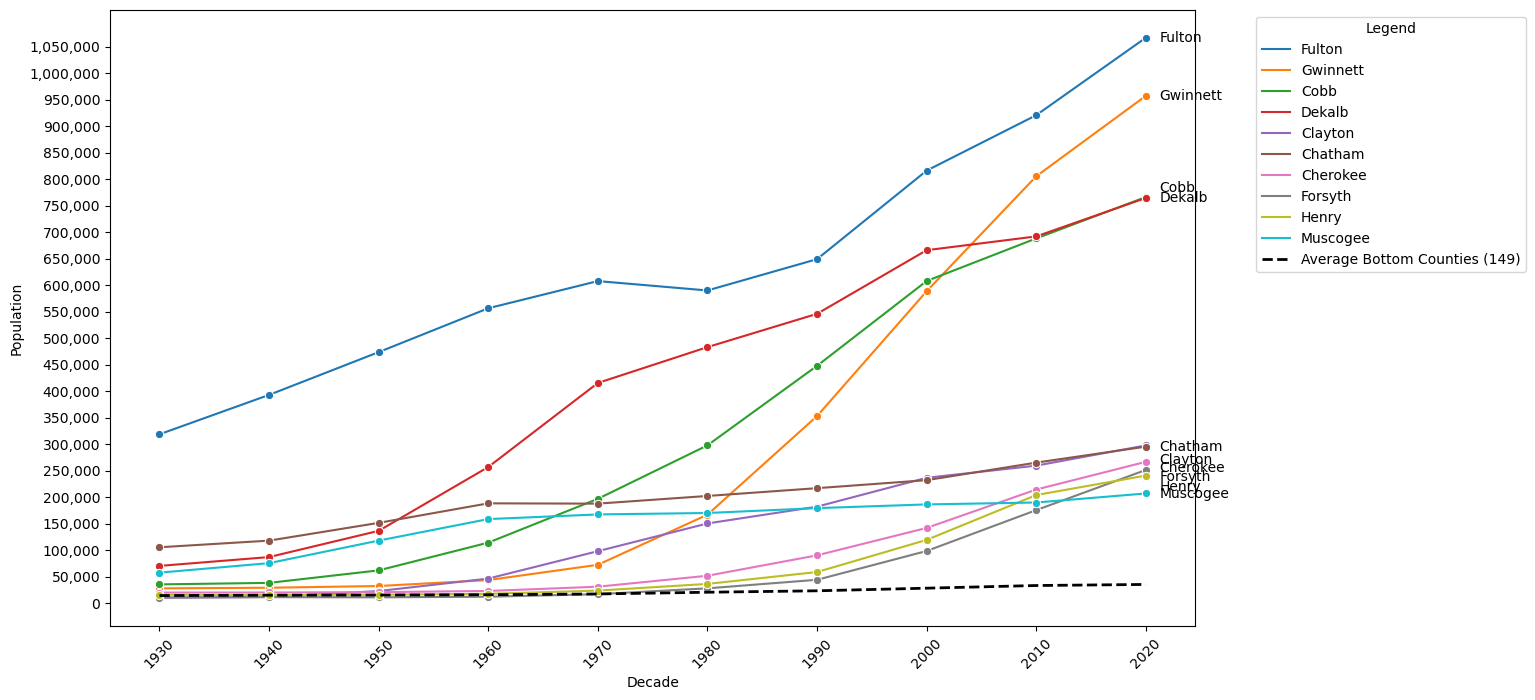

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load your data with the correct file name
df = pd.read_csv('georgia population.csv')
df.columns = df.columns.str.replace(' Population', '')

# Exclude the row for the whole state of Georgia
df = df[df['County'] != 'GEORGIA']

# Select columns for analysis or visualization
pop_columns = [col for col in df.columns if 'Rank' not in col]
df_population = df[pop_columns]

# Melt the DataFrame to reshape it for plotting and handle commas in 'Population'
df_melted = pd.melt(df_population, id_vars=['County'], var_name='Decade', value_name='Population')
df_melted['Population'] = pd.to_numeric(df_melted['Population'].str.replace(',', ''), errors='coerce').dropna()

# Change county names to title case
df_melted['County'] = df_melted['County'].str.title()

# Get the top ten counties by population
top_counties = df_melted.groupby('County')['Population'].max().nlargest(10).index

# Get the bottom counties by population
bottom_counties = df_melted.groupby('County')['Population'].max().nsmallest(149).index

# Calculate the average population for the bottom counties
average_population_bottom = df_melted[df_melted['County'].isin(bottom_counties)].groupby('Decade')['Population'].mean()

# Plot the data
plt.figure(figsize=(14, 8))
x = sns.lineplot(x='Decade', y='Population', hue='County', data=df_melted[df_melted['County'].isin(top_counties)], marker='o', hue_order=top_counties)

# Add a line for the average population of the bottom counties
plt.plot(average_population_bottom.index, average_population_bottom.values, label='Average Bottom Counties (149)', linestyle='--', linewidth=2, color='black')

#plt.title('Population Trends in Georgia Counties Over Decades')
plt.xlabel('Decade')
plt.ylabel('Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
plt.xticks(rotation=45)

# Set y-axis ticks to be consistent and go by 50,000
population_ticks = np.arange(0, df_melted['Population'].max(), 50000)
plt.yticks(population_ticks)

# Format y-axis ticks with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

# Manually annotate the top ten counties without overlapping labels
for county in top_counties:
    max_population = df_melted[df_melted['County'] == county]['Population'].max()
    if county == "DeKalb" or county == "Clayton":
        plt.annotate(county, xy=(df_melted[df_melted['County'] == county]['Decade'].max(), max_population),
                 xytext=(10, -10), textcoords='offset points', ha='left', va='center', color='black', fontsize=10)
        continue
    elif county == "Henry":
        plt.annotate(county, xy=(df_melted[df_melted['County'] == county]['Decade'].max(), max_population),
                 xytext=(10, -8), textcoords='offset points', ha='left', va='center', color='black', fontsize=10)
        continue
    elif county == "Forsyth":
        plt.annotate(county, xy=(df_melted[df_melted['County'] == county]['Decade'].max(), max_population),
                 xytext=(10, -5), textcoords='offset points', ha='left', va='center', color='black', fontsize=10)
        continue
    elif county == "Cobb":
        plt.annotate(county, xy=(df_melted[df_melted['County'] == county]['Decade'].max(), max_population),
                 xytext=(10, 7), textcoords='offset points', ha='left', va='center', color='black', fontsize=10)
        continue
    elif county == "Cherokee":
        plt.annotate(county, xy=(df_melted[df_melted['County'] == county]['Decade'].max(), max_population),
                 xytext=(10, -4), textcoords='offset points', ha='left', va='center', color='black', fontsize=10)
        continue
    plt.annotate(county, xy=(df_melted[df_melted['County'] == county]['Decade'].max(), max_population),
                 xytext=(10, 0), textcoords='offset points', ha='left', va='center', color='black', fontsize=10)

# Show the plot
# plt.tight_layout()
plt.show()
